In [1]:
!pip3 install kaggle


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr, chi2_contingency, ks_2samp
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

file_path= "/Users/troyduke/2023 MLB Player Stats - Pitching.csv"

# Try reading the file with a fallback encoding
pitching_data = pd.read_csv(file_path, encoding='latin1', sep = ";")  # 'latin1' works for many non-UTF-8 encodings

# Preview the data
print(pitching_data.head())


   Rk            Name  Age   Tm  Lg  W  L   W-L%   ERA   G  ...  WP   BF  \
0   1  Fernando Abad*   37  COL  NL  1  0  1.000  4.26   6  ...   0   32   
1   2  Andrew Abbott*   24  CIN  NL  5  2  0.714  2.10   9  ...   0  213   
2   3     Cory Abbott   27  WSN  NL  0  1  0.000  5.49  10  ...   1   85   
3   4    Albert Abreu   27  NYY  AL  2  2  0.500  4.14  33  ...   2  182   
4   5     Bryan Abreu   26  HOU  AL  3  2  0.600  2.72  47  ...   1  192   

   ERA+   FIP   WHIP    H9  HR9  BB9   SO9  SO/W  
0   124  8.18  2.211  15.6  2.8  4.3   2.8  0.67  
1   226  4.08  0.916   5.3  1.3  2.9   9.2  3.17  
2    77  5.83  1.475   9.2  1.8  4.1   7.3  1.78  
3   103  4.69  1.331   7.4  1.3  4.6  10.0  2.19  
4   155  3.42  1.144   6.6  1.2  3.7  13.4  3.63  

[5 rows x 35 columns]


In [3]:
import pandas as pd

file_path = "/Users/troyduke/2023 MLB Player Stats - Batting.csv"

# Try reading the file with a fallback encoding
batting_data = pd.read_csv(file_path, encoding='latin1',sep = ";")  # 'latin1' works for many non-UTF-8 encodings

# Preview the data
print(batting_data.head())


   Rk              Name  Age   Tm  Lg   G   PA   AB   R    H  ...    OBP  \
0   1        CJ Abrams*   22  WSN  NL  89  340  316  47   82  ...  0.306   
1   2        José Abreu   36  HOU  AL  95  400  368  33   90  ...  0.293   
2   3  Ronald Acuna Jr.   25  ATL  NL  97  446  391  86  129  ...  0.408   
3   4      Willy Adames   27  MIL  NL  89  383  336  44   71  ...  0.291   
4   5       Riley Adams   27  WSN  NL  23   87   79   4   22  ...  0.337   

     SLG    OPS  OPS+   TB  GDP  HBP  SH  SF  IBB  
0  0.434  0.739   105  137    5    8   3   0    0  
1  0.353  0.646    79  130   11    3   0   5    1  
2  0.578  0.986   160  226    7    4   0   2    2  
3  0.411  0.702    90  138    9    3   0   5    0  
4  0.506  0.844   133   40    4    1   1   0    0  

[5 rows x 29 columns]


In [40]:

# Display basic information about the datasets
batting_info = batting_data.info()
pitching_info = pitching_data.info()

# Display first few rows of each dataset
batting_preview = batting_data.head()
pitching_preview = pitching_data.head()

batting_info, batting_preview, pitching_info, pitching_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 695 entries, 0 to 694
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      695 non-null    int64  
 1   Name    695 non-null    object 
 2   Age     695 non-null    int64  
 3   Tm      695 non-null    object 
 4   Lg      695 non-null    object 
 5   G       695 non-null    int64  
 6   PA      695 non-null    int64  
 7   AB      695 non-null    int64  
 8   R       695 non-null    int64  
 9   H       695 non-null    int64  
 10  2B      695 non-null    int64  
 11  3B      695 non-null    int64  
 12  HR      695 non-null    int64  
 13  RBI     695 non-null    int64  
 14  SB      695 non-null    int64  
 15  CS      695 non-null    int64  
 16  BB      695 non-null    int64  
 17  SO      695 non-null    int64  
 18  BA      695 non-null    float64
 19  OBP     695 non-null    float64
 20  SLG     695 non-null    float64
 21  OPS     695 non-null    float64
 22  OP

(None,
    Rk              Name  Age   Tm  Lg   G   PA   AB   R    H  ...    OBP  \
 0   1        CJ Abrams*   22  WSN  NL  89  340  316  47   82  ...  0.306   
 1   2        José Abreu   36  HOU  AL  95  400  368  33   90  ...  0.293   
 2   3  Ronald Acuna Jr.   25  ATL  NL  97  446  391  86  129  ...  0.408   
 3   4      Willy Adames   27  MIL  NL  89  383  336  44   71  ...  0.291   
 4   5       Riley Adams   27  WSN  NL  23   87   79   4   22  ...  0.337   
 
      SLG    OPS  OPS+   TB  GDP  HBP  SH  SF  IBB  
 0  0.434  0.739   105  137    5    8   3   0    0  
 1  0.353  0.646    79  130   11    3   0   5    1  
 2  0.578  0.986   160  226    7    4   0   2    2  
 3  0.411  0.702    90  138    9    3   0   5    0  
 4  0.506  0.844   133   40    4    1   1   0    0  
 
 [5 rows x 29 columns],
 None,
    Rk            Name  Age   Tm  Lg  W  L   W-L%   ERA   G  ...  WP   BF  \
 0   1  Fernando Abad*   37  COL  NL  1  0  1.000  4.26   6  ...   0   32   
 1   2  Andrew Abbott*  

In [46]:
batting_columns = batting_data.columns.tolist()
pitching_columns = pitching_data.columns.tolist()

# Display the first few elements of the columns list
print("First few batting columns:", batting_columns[:5])  # Get first 5 columns
print("All batting columns:", batting_columns)
print("First few pitching columns:", pitching_columns[:5])  # Get first 5 columns
print("All pitching columns:", pitching_columns)



First few batting columns: ['Rk', 'Name', 'Age', 'Tm', 'Lg']
All batting columns: ['Rk', 'Name', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 'HBP', 'SH', 'SF', 'IBB']
First few pitching columns: ['Rk', 'Name', 'Age', 'Tm', 'Lg']
All pitching columns: ['Rk', 'Name', 'Age', 'Tm', 'Lg', 'W', 'L', 'W-L%', 'ERA', 'G', 'GS', 'GF', 'CG', 'SHO', 'SV', 'IP', 'H', 'R', 'ER', 'HR', 'BB', 'IBB', 'SO', 'HBP', 'BK', 'WP', 'BF', 'ERA+', 'FIP', 'WHIP', 'H9', 'HR9', 'BB9', 'SO9', 'SO/W']


In [49]:
# Define column names for the datasets based on standard MLB statistics
pitching_columns = [
    "Rank", "Name", "Age", "Team", "League", "Wins", "Losses", "W-L%", "ERA", "Games", "GS",
    "GF", "CG", "SHO", "SV", "IP", "Hits", "Runs", "ER", "HR", "BB", "IBB", "SO", "HBP", "BK",
    "WP", "BF", "ERA+", "WHIP", "FIP", "H9", "HR9", "BB9", "SO9", "SO/W"
]

batting_columns = ['Rk', 'Name', 'Age', 'Tm', 'Lg', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 
                   'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB', 'GDP', 
                   'HBP', 'SH', 'SF', 'IBB']



# Clean the data (e.g., drop missing values for specific columns)
batting_data_cleaned = batting_data.dropna(subset=['BA', 'OBP', 'SLG', 'HR', 'R', 'RBI', 'SB'])  # Example cleaning step

# Clean pitching data similarly
pitching_data_cleaned = pitching_data.dropna(subset=['ERA', 'W-L%', 'IP', 'SO', 'BB'])  # Example cleaning step for pitching data

# Reassign correct column names to the datasets
batting_data_cleaned.columns = batting_columns
pitching_data_cleaned.columns = pitching_columns

# Verify the updated datasets by showing the first 1000 rows
print("Batting Data (First 1000 rows):")
print(batting_data_cleaned.head(1000))  # Shows first 1000 rows

print("\nPitching Data (First 1000 rows):")
print(pitching_data_cleaned.head(1000))  # Shows first 1000 rows


Batting Data (First 1000 rows):
      Rk               Name  Age   Tm  Lg   G   PA   AB   R    H  ...    OBP  \
0      1         CJ Abrams*   22  WSN  NL  89  340  316  47   82  ...  0.306   
1      2         José Abreu   36  HOU  AL  95  400  368  33   90  ...  0.293   
2      3   Ronald Acuna Jr.   25  ATL  NL  97  446  391  86  129  ...  0.408   
3      4       Willy Adames   27  MIL  NL  89  383  336  44   71  ...  0.291   
4      5        Riley Adams   27  WSN  NL  23   87   79   4   22  ...  0.337   
..   ...                ...  ...  ...  ..  ..  ...  ...  ..  ...  ...    ...   
690  691  Masataka Yoshida*   29  BOS  AL  86  370  335  52  107  ...  0.381   
691  692        Alex Young*   29  CIN  NL   2    0    0   0    0  ...  0.000   
692  693       Jared Young*   27  CHC  NL  13   39   35   7    6  ...  0.256   
693  694        Seby Zavala   29  CHW  AL  59  156  143  14   23  ...  0.208   
694  695        Mike Zunino   32  CLE  AL  42  140  124  11   22  ...  0.271   

       

In [ ]:
# Descriptive statistics for batting data
print("Batting Data Descriptive Statistics:")
print(batting_data.describe())

# Descriptive statistics for pitching data
print("\nPitching Data Descriptive Statistics:")
print(pitching_data.describe())


In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data for regression
X = batting_data[['OBP', 'SLG']].dropna()  # Removing missing values
y = batting_data['R'].dropna()

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Display coefficients
model.intercept_, model.coef_


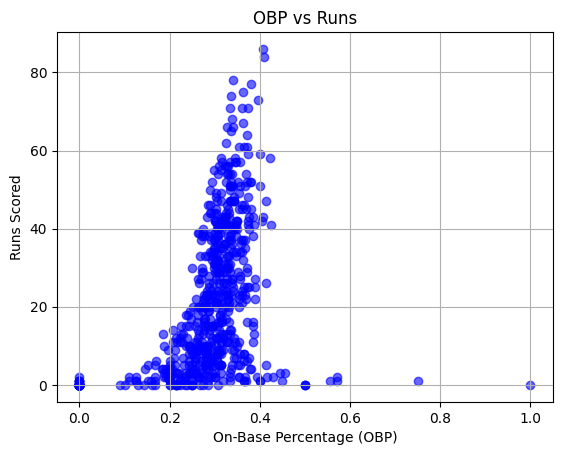

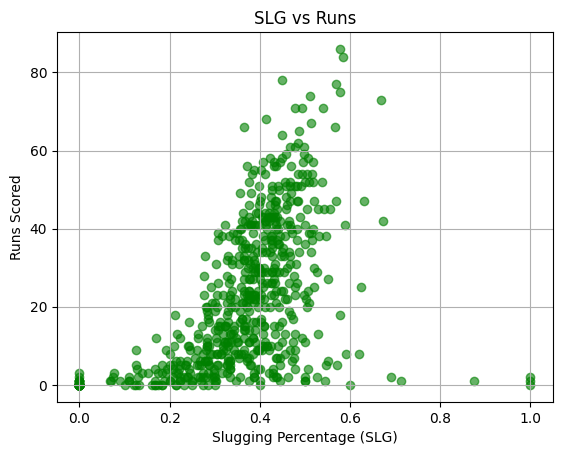

In [6]:
import matplotlib.pyplot as plt

# Plot OBP vs Runs
plt.scatter(batting_data['OBP'], batting_data['R'], color='blue', alpha=0.6)
plt.title('OBP vs Runs')
plt.xlabel('On-Base Percentage (OBP)')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.show()

# Plot SLG vs Runs
plt.scatter(batting_data['SLG'], batting_data['R'], color='green', alpha=0.6)
plt.title('SLG vs Runs')
plt.xlabel('Slugging Percentage (SLG)')
plt.ylabel('Runs Scored')
plt.grid(True)
plt.show()


In [7]:
# Pearson and Spearman correlation
pearson_corr_obp_r = batting_data['OBP'].corr(batting_data['R'], method='pearson')
spearman_corr_obp_r = batting_data['OBP'].corr(batting_data['R'], method='spearman')

pearson_corr_slg_r = batting_data['SLG'].corr(batting_data['R'], method='pearson')
spearman_corr_slg_r = batting_data['SLG'].corr(batting_data['R'], method='spearman')

print("Correlation Analysis:")
print(f"OBP vs Runs - Pearson: {pearson_corr_obp_r}, Spearman: {spearman_corr_obp_r}")
print(f"SLG vs Runs - Pearson: {pearson_corr_slg_r}, Spearman: {spearman_corr_slg_r}")


Correlation Analysis:
OBP vs Runs - Pearson: 0.5247265422031516, Spearman: 0.6637246636887161
SLG vs Runs - Pearson: 0.6078654204965862, Spearman: 0.7238805491442772


In [8]:
from scipy.stats import chi2_contingency

# Example categorical test
# Create a contingency table
contingency_table = pd.crosstab(pitching_data['Lg'], pitching_data['Tm'])  # League vs Team

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared Test:\nChi2: {chi2}, P-value: {p}, Degrees of Freedom: {dof}")


Chi-squared Test:
Chi2: 1295.4223987836874, P-value: 2.0229392568409988e-231, Degrees of Freedom: 60


In [9]:
from scipy.stats import ks_2samp

# Comparing distributions of ERA and WHIP for pitchers
ks_stat, ks_pvalue = ks_2samp(pitching_data['ERA'], pitching_data['WHIP'])
print(f"2-Sample KS Test:\nStatistic: {ks_stat}, P-value: {ks_pvalue}")


2-Sample KS Test:
Statistic: 0.7675276752767528, P-value: 6.089812927082417e-236


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
X = batting_data[['OBP', 'SLG']].dropna()
y = batting_data['R'].dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Linear Regression Results:\nMSE: {mean_squared_error(y_test, y_pred)}, R^2: {r2_score(y_test, y_pred)}")


Linear Regression Results:
MSE: 197.42416726056513, R^2: 0.46359461466701657


In [11]:
# Prepare data
X = pitching_data[['ERA', 'WHIP', 'SO9', 'BB9']].dropna()  # Example key metrics
y = pitching_data['W'].dropna()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"Pitching Model Results:\nMSE: {mean_squared_error(y_test, y_pred)}, R^2: {r2_score(y_test, y_pred)}")


Pitching Model Results:
MSE: 5.580968461534371, R^2: 0.09790629263443906


In [12]:
X = batting_data[['OBP', 'SLG']].dropna()
y = batting_data['R'].dropna()

model = LinearRegression()
model.fit(X, y)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: -1.1341888364178807
Coefficients: [-5.12166959 69.65018432]


In [13]:
kmeans = KMeans(n_clusters=3)
batting_clusters = kmeans.fit_predict(batting_data[['OBP', 'SLG', 'R']].dropna())
print("Cluster Labels:", batting_clusters)


Cluster Labels: [1 2 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 2 0 2 1 0 0 2 2 2 0 0 1 1 0 1 1 2 0
 2 2 1 1 2 0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 0 2 1 2 0 1 2 0 2 2 1 1 2 2 0 2 1
 1 0 0 1 2 0 0 2 0 2 0 0 0 0 1 2 0 1 2 0 0 0 2 2 2 0 1 2 0 0 0 0 2 2 2 1 0
 1 1 2 0 2 2 0 0 0 0 0 1 0 2 0 2 0 0 1 1 2 2 0 1 0 0 2 1 0 2 1 0 0 0 2 0 0
 2 1 2 0 1 2 2 0 0 1 2 0 2 0 0 2 1 0 0 0 1 0 0 2 0 2 0 1 0 1 1 2 0 1 0 0 0
 0 2 2 0 2 1 2 2 0 0 0 0 0 2 0 2 2 1 1 1 1 0 1 0 0 2 0 0 0 2 1 0 1 2 0 2 0
 0 0 0 0 1 0 1 2 0 0 0 0 0 1 2 0 0 2 2 1 0 1 1 0 1 2 0 2 0 0 0 0 0 0 2 2 1
 1 2 0 0 2 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 2 0 2 0 0 2 1 0 0 0 0 0 0 2 1 2
 0 2 2 0 2 2 0 1 0 0 0 2 1 2 2 1 0 0 0 1 0 2 2 0 1 1 2 0 2 2 2 0 0 0 1 0 0
 2 2 2 0 2 0 0 0 0 1 0 2 2 2 1 1 0 0 1 2 0 0 0 2 2 2 2 0 0 0 0 0 0 2 1 1 1
 0 2 0 1 0 2 0 0 0 0 2 2 1 0 0 2 0 1 1 1 1 0 2 1 0 2 0 1 0 0 2 0 2 0 0 0 0
 2 2 2 0 0 0 0 0 1 2 0 1 2 2 0 2 1 0 0 1 0 0 0 0 0 0 1 0 2 0 2 0 1 1 0 1 2
 0 0 2 1 0 2 1 0 1 0 1 0 0 0 1 2 1 0 1 2 0 1 0 0 0 0 0 1 2 2 2 0 2 0 0 0 0
 2 2 0 1 

In [14]:
# Group by team and calculate the mean for OBP, SLG, and Runs
team_stats = batting_data.groupby('Tm')[['OBP', 'SLG', 'R']].mean()

print("Team-wise statistics:\n", team_stats)


Team-wise statistics:
           OBP       SLG          R
Tm                                
ARI  0.227792  0.293667  20.500000
ATL  0.273095  0.353952  26.000000
BAL  0.213429  0.249857  17.250000
BOS  0.243520  0.289880  19.920000
CHC  0.252360  0.309120  18.880000
CHW  0.229435  0.291609  18.217391
CIN  0.238704  0.295222  18.148148
CLE  0.290824  0.331706  23.941176
COL  0.250652  0.327217  18.521739
DET  0.265842  0.322684  20.157895
HOU  0.212652  0.262783  20.086957
KCR  0.263818  0.319818  16.772727
LAA  0.295846  0.377731  18.961538
LAD  0.236040  0.291880  22.160000
MIA  0.310632  0.378316  21.631579
MIL  0.331696  0.395217  17.913043
MIN  0.282048  0.370095  20.666667
NYM  0.280857  0.329286  20.809524
NYY  0.282286  0.385333  20.571429
OAK  0.298091  0.360409  16.454545
PHI  0.309667  0.386056  24.333333
PIT  0.277346  0.331500  15.538462
SDP  0.259913  0.356130  19.695652
SEA  0.198462  0.234654  16.923077
SFG  0.228200  0.263833  15.166667
STL  0.251250  0.305625  19.5833

In [15]:
# Filter for teams in AL and NL leagues
al_batting = batting_data[batting_data['Lg'] == 'AL']
nl_batting = batting_data[batting_data['Lg'] == 'NL']

# Group by team and calculate mean stats for AL and NL
al_team_stats = al_batting.groupby('Tm')[['OBP', 'SLG', 'R']].mean()
nl_team_stats = nl_batting.groupby('Tm')[['OBP', 'SLG', 'R']].mean()

print("AL Team-wise statistics:\n", al_team_stats)
print("NL Team-wise statistics:\n", nl_team_stats)


AL Team-wise statistics:
           OBP       SLG          R
Tm                                
BAL  0.213429  0.249857  17.250000
BOS  0.243520  0.289880  19.920000
CHW  0.229435  0.291609  18.217391
CLE  0.290824  0.331706  23.941176
DET  0.265842  0.322684  20.157895
HOU  0.212652  0.262783  20.086957
KCR  0.263818  0.319818  16.772727
LAA  0.295846  0.377731  18.961538
MIN  0.282048  0.370095  20.666667
NYY  0.282286  0.385333  20.571429
OAK  0.298091  0.360409  16.454545
SEA  0.198462  0.234654  16.923077
TBR  0.289125  0.396062  33.562500
TEX  0.246143  0.307619  27.238095
TOR  0.292300  0.325550  22.200000
TOT  0.118000  0.158600   8.600000
NL Team-wise statistics:
           OBP       SLG          R
Tm                                
ARI  0.227792  0.293667  20.500000
ATL  0.273095  0.353952  26.000000
CHC  0.252360  0.309120  18.880000
CIN  0.238704  0.295222  18.148148
COL  0.250652  0.327217  18.521739
LAD  0.236040  0.291880  22.160000
MIA  0.310632  0.378316  21.631579
MIL

In [16]:
al_batting = batting_data[batting_data['Lg'] == 'AL']
nl_batting = batting_data[batting_data['Lg'] == 'NL']

print("AL Batting:\n", al_batting[['OBP', 'SLG', 'R']].mean())
print("NL Batting:\n", nl_batting[['OBP', 'SLG', 'R']].mean())


AL Batting:
 OBP     0.255293
SLG     0.315272
R      20.232836
dtype: float64
NL Batting:
 OBP     0.266524
SLG     0.327390
R      19.787966
dtype: float64


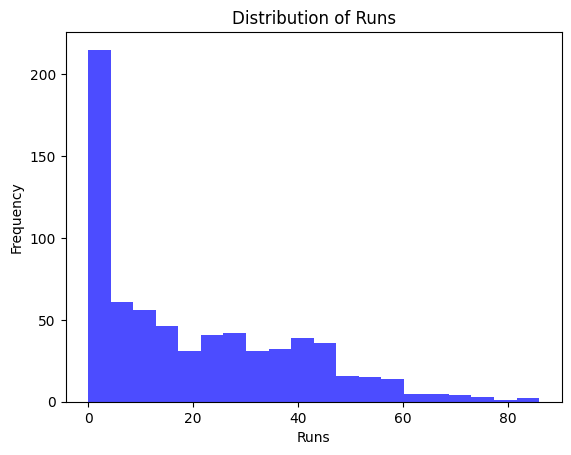

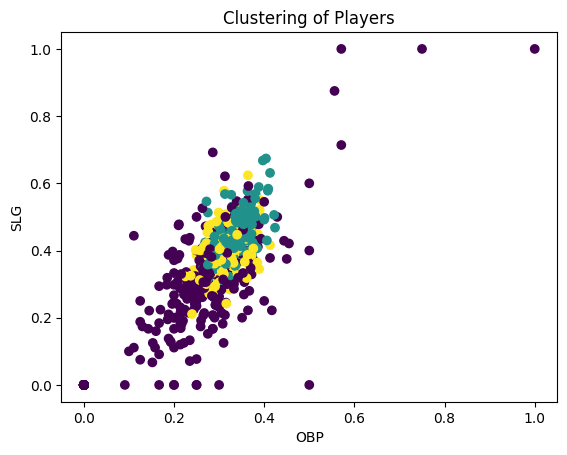

In [17]:
# Histogram
plt.hist(batting_data['R'], bins=20, color='blue', alpha=0.7)
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.title("Distribution of Runs")
plt.show()

# Clustering results visualization
plt.scatter(batting_data['OBP'], batting_data['SLG'], c=batting_clusters)
plt.xlabel("OBP")
plt.ylabel("SLG")
plt.title("Clustering of Players")
plt.show()


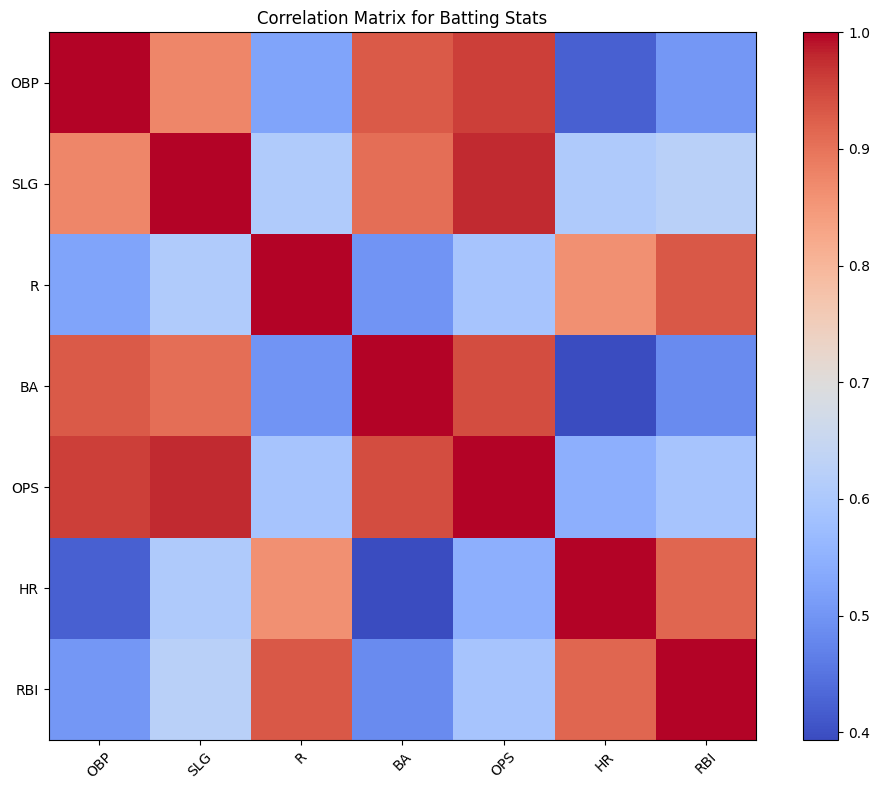

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns for correlation
columns_of_interest = ['OBP', 'SLG', 'R', 'BA', 'OPS', 'HR', 'RBI']
batting_corr_matrix = batting_data[columns_of_interest].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(batting_corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(columns_of_interest)), columns_of_interest, rotation=45)
plt.yticks(np.arange(len(columns_of_interest)), columns_of_interest)
plt.title('Correlation Matrix for Batting Stats')
plt.tight_layout()
plt.show()


In [19]:
# Group by team and calculate the mean for ERA, SO (strikeouts), BB (walks), and W (wins)
team_pitching_stats = pitching_data.groupby('Tm')[['ERA', 'SO', 'BB', 'W']].mean()

print("Team-wise pitching statistics:\n", team_pitching_stats)


Team-wise pitching statistics:
            ERA         SO         BB         W
Tm                                            
ARI   6.648846  31.153846  12.615385  2.076923
ATL   3.888333  37.875000  12.500000  2.625000
BAL   5.975200  35.840000  12.040000  2.400000
BOS   5.478214  30.464286  10.142857  1.857143
CHC   9.625455  36.636364  14.000000  2.136364
CHW   7.310417  39.666667  16.375000  1.708333
CIN   5.553030  25.606061  11.303030  1.636364
CLE   3.686400  31.240000  12.120000  1.960000
COL   6.361724  24.103448  12.448276  1.344828
DET   8.050370  30.222222  10.296296  1.629630
HOU   4.867500  45.900000  15.750000  2.750000
KCR   6.823793  27.206897  12.310345  0.965517
LAA   5.197586  31.068966  12.689655  1.724138
LAD   6.769032  26.387097   9.258065  1.838710
MIA   7.080769  36.230769  11.576923  2.038462
MIL   5.724000  27.833333  10.366667  1.833333
MIN   4.235000  40.000000  11.708333  2.166667
NYM   4.531379  29.034483  12.275862  1.586207
NYY   4.105200  34.520000  1

In [20]:
# Filter for teams in AL and NL leagues
al_pitching = pitching_data[pitching_data['Lg'] == 'AL']
nl_pitching = pitching_data[pitching_data['Lg'] == 'NL']

# Group by team and calculate mean stats for AL and NL
al_team_pitching_stats = al_pitching.groupby('Tm')[['ERA', 'SO', 'BB', 'W']].mean()
nl_team_pitching_stats = nl_pitching.groupby('Tm')[['ERA', 'SO', 'BB', 'W']].mean()

print("AL Team-wise pitching statistics:\n", al_team_pitching_stats)
print("NL Team-wise pitching statistics:\n", nl_team_pitching_stats)


AL Team-wise pitching statistics:
            ERA         SO         BB         W
Tm                                            
BAL   5.975200  35.840000  12.040000  2.400000
BOS   5.478214  30.464286  10.142857  1.857143
CHW   7.310417  39.666667  16.375000  1.708333
CLE   3.686400  31.240000  12.120000  1.960000
DET   8.050370  30.222222  10.296296  1.629630
HOU   4.867500  45.900000  15.750000  2.750000
KCR   6.823793  27.206897  12.310345  0.965517
LAA   5.197586  31.068966  12.689655  1.724138
MIN   4.235000  40.000000  11.708333  2.166667
NYY   4.105200  34.520000  13.240000  2.080000
OAK   7.393333  24.424242  13.030303  0.848485
SEA   4.996552  30.620690   8.862069  1.724138
TBR   6.660303  27.696970   9.303030  1.848485
TEX  10.175000  30.346154  11.038462  2.230769
TOR   4.128500  46.850000  14.750000  2.700000
TOT   4.753750  29.875000  16.125000  1.500000
NL Team-wise pitching statistics:
           ERA         SO         BB         W
Tm                                    

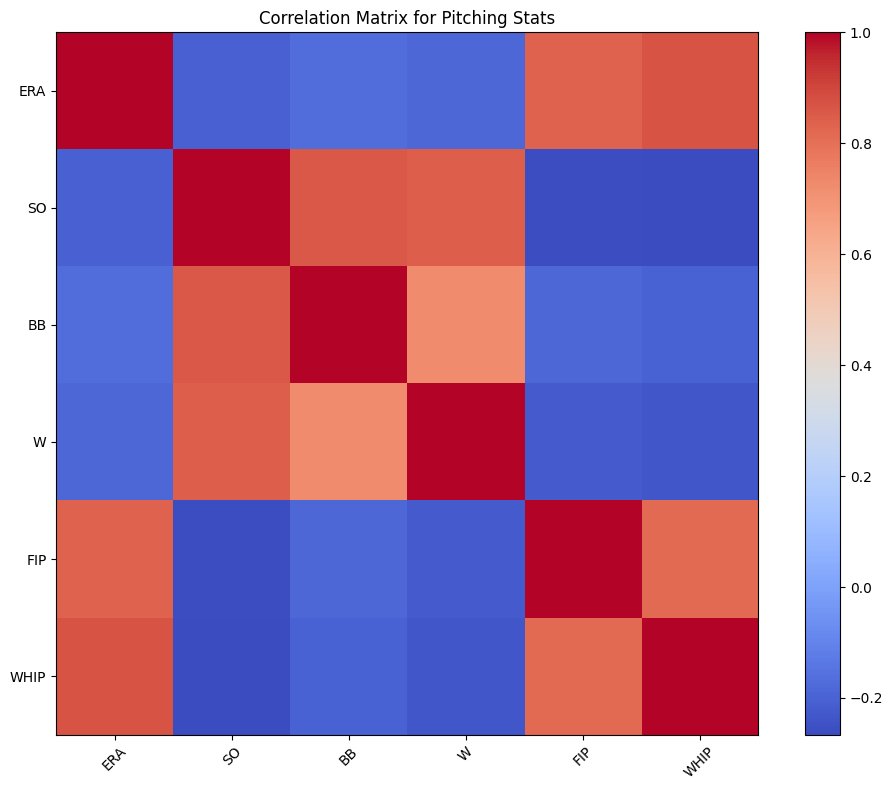

In [21]:
# Select relevant columns for pitching correlation
pitching_columns_of_interest = ['ERA', 'SO', 'BB', 'W', 'FIP', 'WHIP']
pitching_corr_matrix = pitching_data[pitching_columns_of_interest].corr()

# Plotting the correlation matrix for pitching stats
plt.figure(figsize=(10, 8))
plt.imshow(pitching_corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(pitching_columns_of_interest)), pitching_columns_of_interest, rotation=45)
plt.yticks(np.arange(len(pitching_columns_of_interest)), pitching_columns_of_interest)
plt.title('Correlation Matrix for Pitching Stats')
plt.tight_layout()
plt.show()


In [22]:
from sklearn.linear_model import LinearRegression

# Prepare the data for regression (removing missing values)
X_pitching = pitching_data[['ERA', 'SO', 'BB', 'FIP', 'WHIP']].dropna()
y_pitching = pitching_data['W'].dropna()

# Fit the model
pitching_model = LinearRegression()
pitching_model.fit(X_pitching, y_pitching)

# Display coefficients and intercept
print("Pitching Model Intercept:", pitching_model.intercept_)
print("Pitching Model Coefficients:", pitching_model.coef_)


Pitching Model Intercept: -0.12825483304180652
Pitching Model Coefficients: [-0.00580814  0.06058812  0.00312493  0.01442076 -0.02465189]


In [23]:
# Group by league (AL and NL) and calculate the average for relevant pitching statistics
league_pitching_avg = pitching_data.groupby('Lg')[['ERA', 'SO', 'BB', 'W']].mean()

# Display the average pitching stats for AL and NL
print("Average pitching statistics for AL and NL:\n", league_pitching_avg)


Average pitching statistics for AL and NL:
           ERA         SO         BB         W
Lg                                           
AL   6.004444  32.844444  12.138272  1.841975
MLB  6.304286  18.000000   9.500000  0.571429
NL   6.258782  31.642132  12.324873  1.903553


In [24]:
# Filter the pitching data to include only pitchers with ERA < 10
filtered_pitching_data = pitching_data[pitching_data['ERA'] < 10]

# Group by league (AL and NL) and calculate the average for relevant pitching statistics
league_pitching_avg_filtered = filtered_pitching_data.groupby('Lg')[['ERA', 'SO', 'BB', 'W']].mean()

# Display the average pitching stats for AL and NL with ERA < 10
print("Average pitching statistics for AL and NL (ERA < 10):\n", league_pitching_avg_filtered)


Average pitching statistics for AL and NL (ERA < 10):
           ERA         SO         BB         W
Lg                                           
AL   4.289081  35.718919  13.043243  2.013514
MLB  5.880769  19.307692  10.000000  0.615385
NL   4.211586  34.841360  13.288952  2.121813


In [25]:
# Filter the batting data to include only hitters with BA > .050
filtered_batting_data_high_ba = batting_data[batting_data['BA'] > 0.100]

# Group by league (AL and NL) and calculate the average for relevant batting statistics
league_batting_avg_high_ba = filtered_batting_data_high_ba.groupby('Lg')[['BA', 'OBP', 'SLG', 'R', 'HR', 'RBI', 'SB', 'SO']].mean()

# Display the average batting stats for AL and NL with BA > .050
print("Average batting statistics for AL and NL (BA > .050):\n", league_batting_avg_high_ba)


Average batting statistics for AL and NL (BA > .050):
            BA       OBP       SLG          R        HR        RBI        SB  \
Lg                                                                            
AL   0.233650  0.303924  0.380025  24.422383  6.285199  23.425993  3.736462   
MLB  0.235714  0.305000  0.361571  13.142857  2.714286  11.285714  1.857143   
NL   0.245188  0.311435  0.389668  23.616438  6.044521  22.732877  3.688356   

            SO  
Lg              
AL   46.458484  
MLB  25.571429  
NL   43.400685  


In [26]:
# Compare Batting Average (BA) and Pitching Stats (ERA, WHIP) for leagues with and without the mask

# Without the mask (using the entire batting dataset)
league_batting_avg_no_mask = batting_data.groupby('Lg')['BA'].mean()

# With the mask (filtering for BA > 0.100)
filtered_batting_data_high_ba = batting_data[batting_data['BA'] > 0.100]
league_batting_avg_with_mask = filtered_batting_data_high_ba.groupby('Lg')['BA'].mean()

# Without the mask (using the entire pitching dataset)
league_pitching_era_no_mask = pitching_data.groupby('Lg')['ERA'].mean()
league_pitching_whip_no_mask = pitching_data.groupby('Lg')['WHIP'].mean()

# Combine both comparisons into a single DataFrame for easy comparison
batting_pitching_comparison = pd.DataFrame({
    'BA (No Mask)': league_batting_avg_no_mask,
    'BA (With Mask)': league_batting_avg_with_mask,
    'ERA (No Mask)': league_pitching_era_no_mask,
    'WHIP (No Mask)': league_pitching_whip_no_mask
})

# Display the comparison
print("Comparison of Batting and Pitching Stats by League:\n", batting_pitching_comparison)


Comparison of Batting and Pitching Stats by League:
      BA (No Mask)  BA (With Mask)  ERA (No Mask)  WHIP (No Mask)
Lg                                                              
AL       0.194110        0.233650       6.004444        1.603407
MLB      0.150000        0.235714       6.304286        1.753857
NL       0.206097        0.245188       6.258782        1.668485


In [27]:
league_batting_avg_no_mask = batting_data.groupby('Lg')['BA'].mean()

# With the mask (filtering for BA > 0.100)
filtered_batting_data_high_ba = batting_data[batting_data['BA'] > 0.100]
league_batting_avg_with_mask = filtered_batting_data_high_ba.groupby('Lg')['BA'].mean()

# Step 6: Filter the pitching data to include only pitchers with ERA < 10
filtered_pitching_data = pitching_data[pitching_data['ERA'] < 10]

# Step 7: Group by league (AL and NL) and calculate the average for relevant pitching statistics
league_pitching_avg_filtered = filtered_pitching_data.groupby('Lg')[['ERA', 'SO', 'BB', 'W']].mean()

# Step 8: Combine all comparisons into a single DataFrame for easy comparison
batting_pitching_comparison = pd.DataFrame({
    'BA (No Mask)': league_batting_avg_no_mask,
    'BA (With Mask)': league_batting_avg_with_mask,
    'ERA (ERA < 10)': league_pitching_avg_filtered['ERA'],
    'SO (ERA < 10)': league_pitching_avg_filtered['SO'],
    'BB (ERA < 10)': league_pitching_avg_filtered['BB'],
    'W (ERA < 10)': league_pitching_avg_filtered['W']
})

# Step 9: Display the comparison
print("\nComparison of Batting and Pitching Stats by League:")
print(batting_pitching_comparison)


Comparison of Batting and Pitching Stats by League:
     BA (No Mask)  BA (With Mask)  ERA (ERA < 10)  SO (ERA < 10)  \
Lg                                                                 
AL       0.194110        0.233650        4.289081      35.718919   
MLB      0.150000        0.235714        5.880769      19.307692   
NL       0.206097        0.245188        4.211586      34.841360   

     BB (ERA < 10)  W (ERA < 10)  
Lg                                
AL       13.043243      2.013514  
MLB      10.000000      0.615385  
NL       13.288952      2.121813  


In [28]:
# Without the mask (using the entire batting dataset)
league_batting_avg_no_mask = batting_data.groupby('Lg')['BA'].mean()

# With the mask (filtering for BA > 0.100)
filtered_batting_data_high_ba = batting_data[batting_data['BA'] > 0.100]
league_batting_avg_with_mask = filtered_batting_data_high_ba.groupby('Lg')['BA'].mean()

# Step 6: Pitching Stats with and without the mask (ERA < 10)
# Without the mask (using the entire pitching dataset)
league_pitching_avg_no_mask = pitching_data.groupby('Lg')[['ERA', 'SO', 'BB', 'W']].mean()

# Filter the pitching data to include only pitchers with ERA < 10
filtered_pitching_data = pitching_data[pitching_data['ERA'] < 10]

# With the mask (ERA < 10)
league_pitching_avg_filtered = filtered_pitching_data.groupby('Lg')[['ERA', 'SO', 'BB', 'W']].mean()

# Step 7: Combine all comparisons into a single DataFrame for easy comparison
batting_pitching_comparison = pd.DataFrame({
    'BA (No Mask)': league_batting_avg_no_mask,
    'BA (With Mask)': league_batting_avg_with_mask,
    'ERA (No Mask)': league_pitching_avg_no_mask['ERA'],
    'SO (No Mask)': league_pitching_avg_no_mask['SO'],
    'BB (No Mask)': league_pitching_avg_no_mask['BB'],
    'W (No Mask)': league_pitching_avg_no_mask['W'],
    'ERA (ERA < 10)': league_pitching_avg_filtered['ERA'],
    'SO (ERA < 10)': league_pitching_avg_filtered['SO'],
    'BB (ERA < 10)': league_pitching_avg_filtered['BB'],
    'W (ERA < 10)': league_pitching_avg_filtered['W']
})

# Step 8: Display the comparison
print("\nComparison of Batting and Pitching Stats by League (with and without the mask):")
print(batting_pitching_comparison)


Comparison of Batting and Pitching Stats by League (with and without the mask):
     BA (No Mask)  BA (With Mask)  ERA (No Mask)  SO (No Mask)  BB (No Mask)  \
Lg                                                                             
AL       0.194110        0.233650       6.004444     32.844444     12.138272   
MLB      0.150000        0.235714       6.304286     18.000000      9.500000   
NL       0.206097        0.245188       6.258782     31.642132     12.324873   

     W (No Mask)  ERA (ERA < 10)  SO (ERA < 10)  BB (ERA < 10)  W (ERA < 10)  
Lg                                                                            
AL      1.841975        4.289081      35.718919      13.043243      2.013514  
MLB     0.571429        5.880769      19.307692      10.000000      0.615385  
NL      1.903553        4.211586      34.841360      13.288952      2.121813  


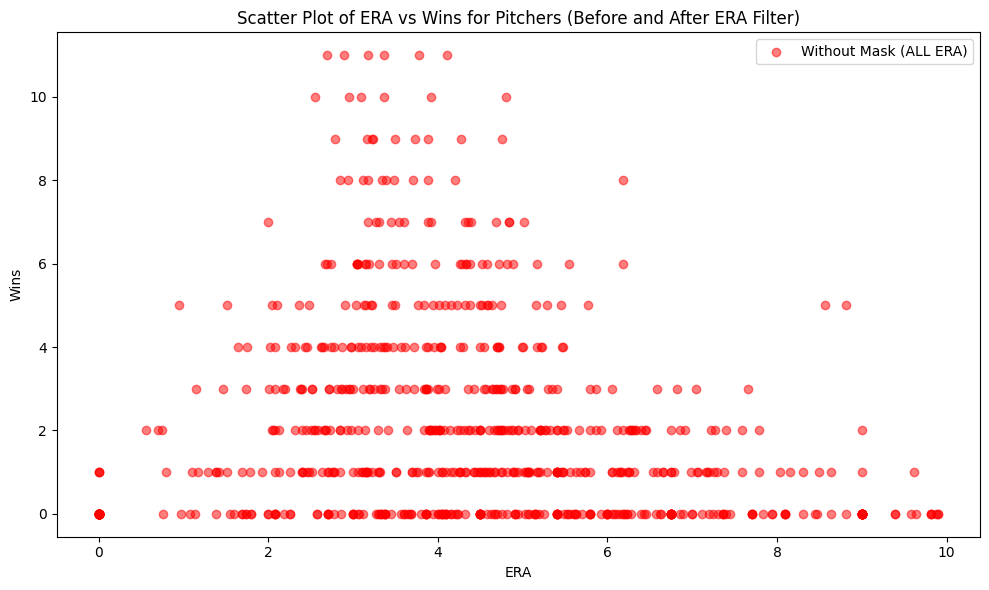

In [29]:
era_wins_no_mask = pitching_data[['ERA', 'W']]

# Filter the pitching data to include only pitchers with ERA < 10 (the mask)
filtered_pitching_data = pitching_data[pitching_data['ERA'] < 10]
era_wins_with_mask = filtered_pitching_data[['ERA', 'W']]

# Step 4: Plotting the scatter plot for ERA vs. Wins (before and after applying the ERA filter)



plt.figure(figsize=(10, 6))
plt.title('Scatter Plot of ERA vs Wins for Pitchers (Before and After ERA Filter)')
plt.xlabel('ERA')
plt.ylabel('Wins')
plt.scatter(era_wins_with_mask['ERA'], era_wins_with_mask['W'], color='red', alpha=0.5, label='Without Mask (ALL ERA)')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

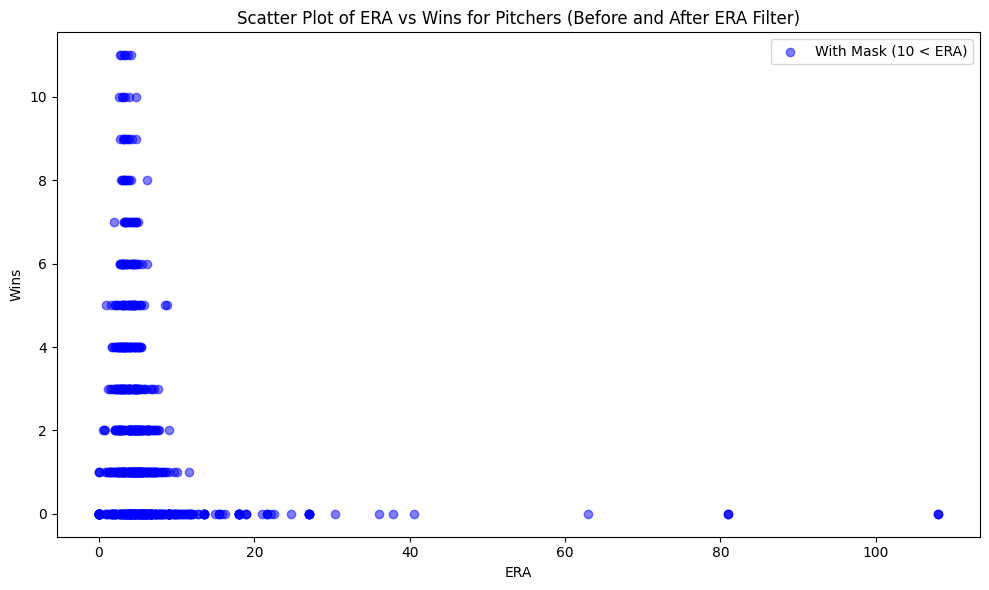

In [30]:
plt.figure(figsize=(10, 6))

# Scatter plot for ERA vs Wins before applying the filter
plt.scatter(era_wins_no_mask['ERA'], era_wins_no_mask['W'], color='blue', alpha=0.5, label='With Mask (10 < ERA)')

# Scatter plot for ERA vs Wins after applying the filter (ERA < 10)


# Set plot title and labels
plt.title('Scatter Plot of ERA vs Wins for Pitchers (Before and After ERA Filter)')
plt.xlabel('ERA')
plt.ylabel('Wins')

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

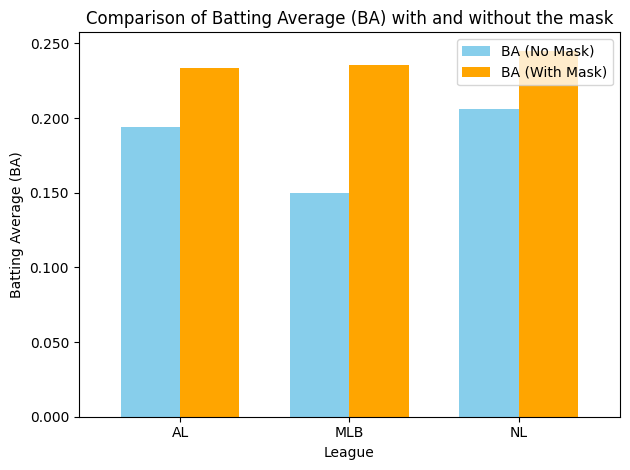

In [31]:
from matplotlib.ticker import FuncFormatter

# Your data for plotting
batting_data_for_plot = pd.DataFrame({
    'BA (No Mask)': league_batting_avg_no_mask,
    'BA (With Mask)': league_batting_avg_with_mask
})

# Step 5: Plotting the bar graph for Batting Average (BA) comparison
plt.figure(figsize=(8, 6))
ax = batting_data_for_plot.plot(kind='bar', color=['skyblue', 'orange'], width=0.7)

# Set plot title and labels
plt.title('Comparison of Batting Average (BA) with and without the mask')
plt.ylabel('Batting Average (BA)')
plt.xlabel('League')
plt.xticks(rotation=0)

# Format Y-axis to display values as batting averages
formatter = FuncFormatter(lambda y, _: f'{y:.3f}')
plt.gca().yaxis.set_major_formatter(formatter)

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error, r2_score

# Filter for American League (AL) pitchers
al_pitchers = pitching_data[pitching_data['Lg'] == 'AL']

# Features and target variables
# Features: Adjust based on what is relevant in your dataset
features = al_pitchers[['ERA', 'WHIP', 'SO', 'HR', 'BB', 'IP']]
targets = al_pitchers[['W', 'L']]  # W: Wins, L: Losses, BAA: Batting Average Against

# Handle missing values by dropping rows with NaNs
features = features.dropna()
targets = targets.loc[features.index]  # Ensure alignment after dropping NaNs

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.2, random_state=42)

# Train a MultiOutput RandomForestRegressor
model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred, multioutput='variance_weighted')

print("Mean Squared Error for each target:", mse)
print("R-squared score:", r2)

# Test with a new AL pitcher
# Define the new pitcher data as a DataFrame with appropriate column names
new_pitcher = pd.DataFrame(
    [[3.25, 1.15, 120, 15, 25, 90]],  # Example stats: ERA, WHIP, SO, HR, BB, IP
    columns=['ERA', 'WHIP', 'SO', 'HR', 'BB', 'IP']
)

# Scale the new pitcher data using the trained StandardScaler
new_pitcher_scaled = scaler.transform(new_pitcher)

# Predict the performance
prediction = model.predict(new_pitcher_scaled)

print("Predicted Wins, Losses:", prediction)


Mean Squared Error for each target: 0.00047589801397601315
R-squared score: 0.648664629586352
Predicted Wins, Losses: [[4.99 5.8 ]]


Mean Absolute Error: 0.0169290312722998
R-squared: 0.9470142346725628


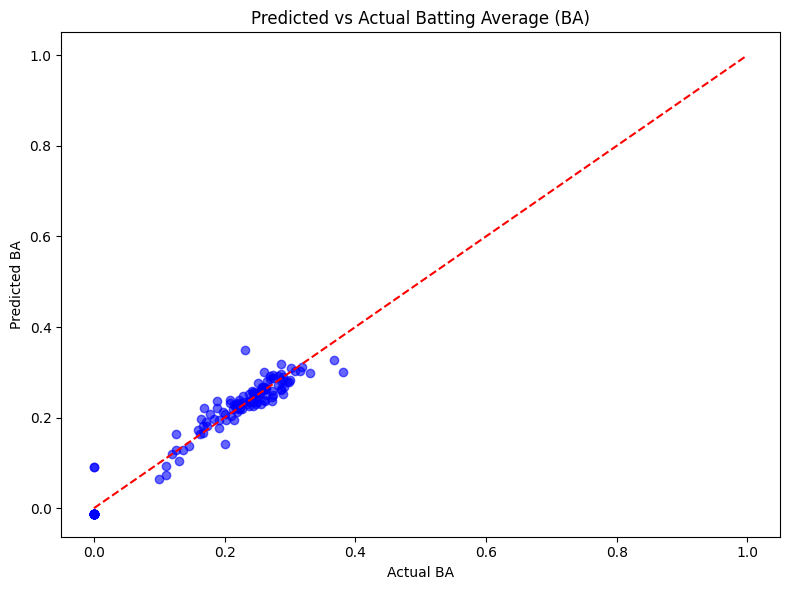

In [37]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
X = batting_data[['OBP', 'SLG', 'HR', 'R', 'RBI', 'SB']]  # Features
y = batting_data['BA']  # Target variable

# Step 4: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize the model (Linear Regression)
model = LinearRegression()

# Step 6: Train the model on the training data
model.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Step 9: Visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Predicted vs Actual Batting Average (BA)")
plt.xlabel("Actual BA")
plt.ylabel("Predicted BA")
plt.tight_layout()
plt.show()

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


batting_features = ['G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'OBP', 'SLG', 'OPS']

# Ensure that the 'BA' column is available and clean (drop NaNs if necessary)
batting_data = batting_data.dropna(subset=['BA'])

# Prepare the feature matrix (X) and the target vector (y)
X = batting_data[batting_features]  # Features
y = batting_data['BA']  # Target (Batting Average)

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 5: Compare actual vs predicted BA for the first few entries in the test set
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.head())


Mean Squared Error: 0.00047589801397601315
     Actual  Predicted
381   0.282   0.297132
667   0.270   0.296954
257   0.230   0.235218
338   0.146   0.133248
319   0.261   0.304657


Mean Absolute Error: 0.0169290312722998
R-squared: 0.9470142346725628


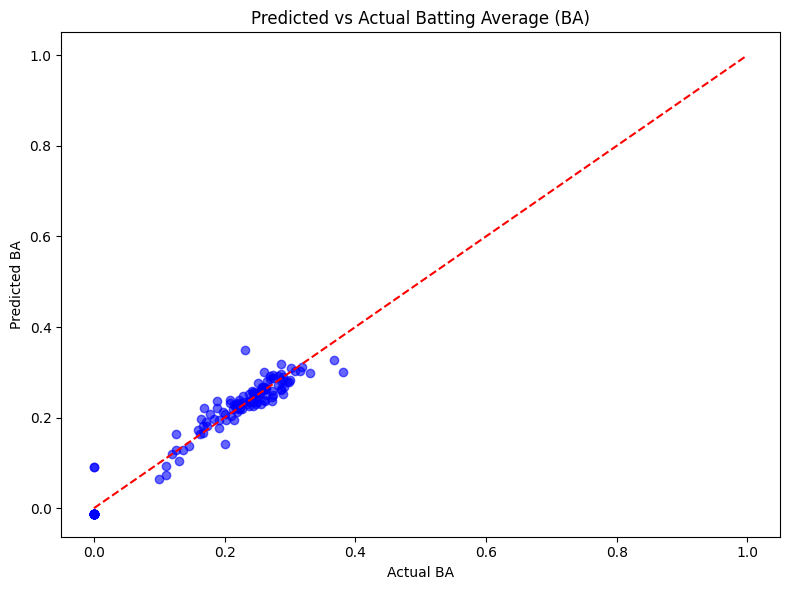

Predicted Average Batting Average (BA): 0.187
     Actual BA  Predicted BA
381      0.282      0.292744
667      0.270      0.291218
257      0.230      0.234925
338      0.146      0.137872
319      0.261      0.299934


In [50]:
# Step 2: Preprocess the data
# Drop any rows with missing values for simplicity
batting_data = batting_data.dropna(subset=['BA', 'OBP', 'SLG', 'HR', 'R', 'RBI', 'SB'])

# Step 3: Select the features (independent variables) and the target variable
# We want to predict the 'BA' (Batting Average)
X = batting_data[['OBP', 'SLG', 'HR', 'R', 'RBI', 'SB']]  # Features
y = batting_data['BA']  # Target variable

# Step 4: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize the model (Linear Regression)
model = LinearRegression()

# Step 6: Train the model on the training data
model.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 8: Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print the model evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Step 9: Visualize the predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title("Predicted vs Actual Batting Average (BA)")
plt.xlabel("Actual BA")
plt.ylabel("Predicted BA")
plt.tight_layout()
plt.show()

# Step 10: Create a DataFrame with actual and predicted values
predictions_df = pd.DataFrame({
    'Actual BA': y_test,
    'Predicted BA': y_pred
})

# Step 11: Calculate and print the predicted average (average of the predicted values)
predicted_avg = y_pred.mean()
print(f"Predicted Average Batting Average (BA): {predicted_avg:.3f}")

# Optional: Show the first few predicted vs actual values
print(predictions_df.head())